In [ ]:
!git clone https://github.com/mss423/data602-fall2023.git

fatal: destination path 'data602-fall2023' already exists and is not an empty directory.


# Part 1: Data scraping and preparation

## Step 1: Scraping competitor's data


In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import zipfile
import os
import csv
from glob import glob
import copy
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
#Achieving the html of the webpage usign bs4 and requests
url = "https://web.archive.org/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html"
req = Request(url)
webpage = urlopen(req)
print(f"Request: {req}\nAfter opening url: {webpage}\n")

page_soup = soup(webpage, "html.parser")            #Getting the html of the document
# page_soup.prettify()

Request: <urllib.request.Request object at 0x7ea038a01930>
After opening url: <http.client.HTTPResponse object at 0x7e9ff987df00>



In [ ]:
#Finding the right table using class
table = page_soup.findAll("table", {"class": "table table-striped table-responsive-md"})
print(f"Total number of tables: {len(table)}")
space_weather_table = table[0]       #this is the appropriate table
# print(space_weather_table)

Total number of tables: 1


The real region data is contained in the html pages i.e `regex="\d+.html"`. So, need to collect the region's data after making a pandas dataframe.

In [ ]:
data = pd.read_html(str(space_weather_table))      #Reading the html file with the help of pandas
data = data[0]                                     #The variable data is a list of length 1 having dataframe in it. So, replacing

#Tidying up the column names
data.columns = ["rank", "x_classification", "date", "region", "start_time", "maximum_time", "end_time", "movie"]

#The region names taken here are not perfect. So, tidying this up, we get
regions = re.findall('/\d+.html', str(space_weather_table))
for num in range(len(regions)): regions[num] = int(regions[num][1:-5])
data['region'] = regions

data

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,10486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,10486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,10808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,10486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,12673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,10930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,10486,17:03,17:25,17:39,MovieView archive


## Step 2: Tidy the top 50 solar flare data

Converting the dates to datetime format and removing unnececssary data

In [ ]:
#Converting dates into pd.Datetime format
for period in ["start", "maximum", "end"]:  #Setting time
    if f"{period}_time" not in data.columns: continue
    data[f'{period}_time'] = data['date'].astype(str) + " " + data[f"{period}_time"].astype(str) + ':00'
    data[f"{period}_time"] = pd.to_datetime(data[f"{period}_time"], format="%Y-%m-%d %H:%M:%S")

data = data.drop(['movie', 'date'], axis=1, errors='ignore')            #Deleting unwanted data
data.fillna('NaN', inplace=True)                                        #Filling all empty ones to NaN

#Renaming columns according to the data
data.rename(columns={'start_time': 'start_datetime',
                     'maximum_time': 'maximum_datetime',
                     'end_time': 'end_datetime'}, inplace=True, errors='ignore')
data

,rank,x_classification,region,start_datetime,maximum_datetime,end_datetime
0,1,X28+,10486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,10486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,10808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,10486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,12673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,10930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,10486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


## Step 3: Scrape the NASA data

In [ ]:
#Achieving the html of the webpage usign bs4 and requests
nasa_url = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
nasa_req = Request(nasa_url)
nasa_webpage = urlopen(nasa_req)
print(f"Request: {req}\nAfter opening nasa url: {webpage}\n")

nasa_page_soup = soup(nasa_webpage, "html.parser")            #Getting the html of the document
# nasa_page_soup.prettify()

Request: <urllib.request.Request object at 0x7ea038a01930>
After opening nasa url: <http.client.HTTPResponse object at 0x7e9ff987df00>



In [ ]:
#Finding the right table using class
nasa_table = nasa_page_soup.findAll("pre")
print(f"Total number of tables: {len(nasa_table)}")
# nasa_table[0] #This is the table we need

Total number of tables: 1


Converting the nasa raw data into pandas dataframe by removing unwanted links and text, converting to list to append to pandas dataframe and then naming columns.

In [ ]:
#Splitting into rows and then into columns
nasa_html_removed_data = re.sub('</a>', '', str(nasa_table[0]))
nasa_html_removed_data = re.sub('<a href="[^"]*">', '', nasa_html_removed_data)
nasa_html_removed_data = re.sub('-[-/:]+-', 'NaN', nasa_html_removed_data)

#Splitting according to the lines and collecting only the data
nasa_unrefined_data = nasa_html_removed_data.split('\n')                                  #Rows
nasa_unrefined_data = nasa_unrefined_data[12:len(nasa_unrefined_data)-2]
for i in range(len(nasa_unrefined_data)):
    if len(nasa_unrefined_data[i]) < 15: assert "Error"
    nasa_unrefined_data[i] = nasa_unrefined_data[i].split()[:15]  #Columns

#Creating nasa dataframe
nasa_columns = ["start_date", "start_time", "end_date", "end_time", "start_frequency", "end_frequency",
                "flare_location", "flare_region", "flare_importance", "cme_date", "cme_time", "cme_angle",
                "cme_width", "cme_speed", "plots"]
nasa_data = pd.DataFrame(nasa_unrefined_data, columns=nasa_columns)
nasa_data

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_date,cme_time,cme_angle,cme_width,cme_speed,plots
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,NaN,NaN,09/17,12:00,Halo,360,1385,PHTX
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001,PHTX
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,PHTX
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,NaN,M4.4,11/29,13:25,Halo,360,2077,NaN


## Step 4: Tidy the NASA table

Setting region to numeric, halo and lower bound, and dates in datetime format and removing unnecessary columns

In [ ]:
#Setting region as number format
for col in ['flare_region', 'start_frequency', 'end_frequency']:
    nasa_data[col] = pd.to_numeric(nasa_data[col], errors='coerce')

#Setting Halo
if "plot_is_halo" not in nasa_data.columns:
    nasa_data['plot_is_halo'] = nasa_data["cme_angle"] == "Halo"
nasa_data['cme_angle'] = pd.to_numeric(nasa_data['cme_angle'], errors='coerce')

#Setting width's lower bounds
if 'lower_bound' not in nasa_data.columns:
    nasa_data['lower_bound'] = nasa_data['cme_width'].str.contains('&gt;')
    nasa_data['cme_width'] = nasa_data['cme_width'].str.replace('[^0-9]*', '', regex=True)
nasa_data['cme_width'] = pd.to_numeric(nasa_data['cme_width'], errors='coerce')

#Splitting start year, month and date for year
if "end_datetime" not in nasa_data.columns:
    nasa_data[["start_year", "start_month", "start_day"]] = nasa_data["start_date"].str.split('/', expand=True)
    nasa_data["end_date"] = nasa_data["start_year"].astype(str) + '/' +  nasa_data["end_date"].astype(str)
    nasa_data["cme_date"] = nasa_data["start_year"].astype(str) + '/' +  nasa_data["cme_date"].astype(str)


    #Setting dates
    for period in ["start", 'cme', 'end']:
        if f"{period}_date" not in nasa_data.columns: continue
        set_24_hr = (nasa_data[f'{period}_time'] == '24:00')
        nasa_data[f'{period}_time'] = nasa_data[f'{period}_time'].str.replace('24:00', '00:00')

        nasa_data[f"{period}_date"] = nasa_data[f'{period}_date'].astype(str) + ' ' + nasa_data[f"{period}_time"].astype(str) + ":00"
        nasa_data[f"{period}_datetime"] = pd.to_datetime(nasa_data[f"{period}_date"], format="%Y/%m/%d %H:%M:%S", errors='coerce')
        nasa_data[f"{period}_datetime"] += pd.Timedelta(days=1)*set_24_hr

    nasa_data = nasa_data.drop(columns=["start_year", "start_month", "start_day", "end_date", "start_date", "cme_date",
                                        "end_time", "cme_time", "start_time"], errors="ignore")


# Part 2: Analysis
## Question 1: Replication

Since Top 50 solar flares are classified based on the `flare_importance` since the strength is present in this column as provided in the links below:


1. https://en.wikipedia.org/wiki/Solar_flare#Classification
2. https://spaceweather.com/glossary/flareclasses.html

Creating the `flare_classification` and `flare_intensity` columns from `flare_importance` column to sort them according to the intensity.

In [ ]:
#Getting flare classification neatly from NASA data
nasa_data['flare_classification'] = nasa_data['flare_importance'].str.get(0)
nasa_data['flare_classification'] = nasa_data['flare_classification'].where(nasa_data['flare_classification'].isin(['A', 'B', 'C', 'M', 'X']), np.NaN)
nasa_data['flare_classification'] = nasa_data['flare_classification'].astype(pd.CategoricalDtype(categories=['A', 'B', 'C', 'M', 'X'], ordered=True))

nasa_data['flare_intensity'] = pd.to_numeric(nasa_data['flare_importance'].str.slice(1), errors='coerce')

nasa_data.sort_values(by=['flare_classification', 'flare_intensity'], ascending=False).iloc[:50, :]

,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_angle,cme_width,cme_speed,plots,plot_is_halo,lower_bound,start_datetime,cme_datetime,end_datetime,flare_classification,flare_intensity
240,10000.0,200.0,S19W83,10486.0,X28.,NaN,360.0,2657,PHTX,True,False,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-05 00:00:00,X,28.0
117,14000.0,250.0,N19W72,9393.0,X20.,261.0,244.0,2505,PHTX,False,False,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00,X,20.0
233,14000.0,40.0,S16E08,10486.0,X17.,NaN,360.0,2459,PHTX,True,False,2003-10-28 11:10:00,2003-10-28 11:30:00,2003-10-30 00:00:00,X,17.0
126,14000.0,40.0,S20W85,9415.0,X14.,245.0,167.0,1199,PHTX,False,False,2001-04-15 14:05:00,2001-04-15 14:06:00,2001-04-16 13:00:00,X,14.0
234,11000.0,500.0,S15W02,10486.0,X10.,NaN,360.0,2029,PHTX,True,False,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-30 00:00:00,X,10.0
8,14000.0,100.0,S18W63,8100.0,X9.4,NaN,360.0,1556,PHTX,True,False,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,X,9.4
514,16000.0,70.0,S08W33,12673.0,X9.3,NaN,360.0,1571,PHTX,True,False,2017-09-06 12:05:00,2017-09-06 12:24:00,2017-09-07 08:00:00,X,9.3
328,14000.0,250.0,S07E68,10930.0,X9.0,NaN,NaN,NaN,PHTX,False,False,2006-12-05 10:50:00,NaT,2006-12-05 20:00:00,X,9.0
237,12000.0,250.0,S14W56,10486.0,X8.3,NaN,360.0,2598,PHTX,True,False,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,X,8.3
515,16000.0,150.0,S09W92,NaN,X8.3,NaN,360.0,3163,PHTX,True,False,2017-09-10 16:02:00,2017-09-10 16:00:00,2017-09-11 06:50:00,X,8.3


In [ ]:
#Just to show neatly
nasa_data.sort_values(by=['flare_classification', 'flare_intensity'], ascending=False).iloc[:50, :][['flare_importance', 'flare_region', 'start_datetime', 'cme_datetime', 'end_datetime']]

,flare_importance,flare_region,start_datetime,cme_datetime,end_datetime
240,X28.,10486.0,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-05 00:00:00
117,X20.,9393.0,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00
233,X17.,10486.0,2003-10-28 11:10:00,2003-10-28 11:30:00,2003-10-30 00:00:00
126,X14.,9415.0,2001-04-15 14:05:00,2001-04-15 14:06:00,2001-04-16 13:00:00
234,X10.,10486.0,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-30 00:00:00
8,X9.4,8100.0,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00
514,X9.3,12673.0,2017-09-06 12:05:00,2017-09-06 12:24:00,2017-09-07 08:00:00
328,X9.0,10930.0,2006-12-05 10:50:00,NaT,2006-12-05 20:00:00
237,X8.3,10486.0,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00
515,X8.3,NaN,2017-09-10 16:02:00,2017-09-10 16:00:00,2017-09-11 06:50:00


This top 50 list from NASA is not in sync with the SpaceWeatherLive.com because of the inconsistancies in the NASA data. For example, from the Wikipedia's link: https://en.wikipedia.org/wiki/Solar_flare#Examples_of_large_solar_flares, 7th September 2005 has a flux of X17, which is also present in the SpaceWeatherLive.com but in the NASA data, the flux is given as X1.7.

## Question 2: Integration
Reference: https://www.hcbravo.org/IntroDataSci/projects/project1/

General similarities between NASA data and SpaceWeatherLive.com

1. Since SpaceWeatherLive.com displays top 50 solar flares, the flare importance should match (not always as shown in the example above and in the rank 42, nasa data mentions M1.8 whereas the classification is X3).
2. The start, end and maximum dates must be very near as possible (I took the difference as 2hrs since they are not sync with the NASA data).
3. The region should be same in both the plots. (not always, for example, rank 34 has same flare xlassification, start date and cme date but not the region)

Algorithm:

If at least three out of five i.e start, end and cme dates, flare classification and region match, then I consider the NASA data and Spaceweather data to be similar

In [ ]:
def similar_flare_in_nasa_dataset(rank, data, nasa_data):
    relevant_info = data[data['rank'] == rank].iloc[0, :]
    nasa_data['similarity'] = 0

    #Search using flare_importance
    data_flare = re.sub("[^\w.]", "", relevant_info['x_classification'])
    if '.' not in data_flare: data_flare += '.'     #Dot is present in every NASA data's flare_importance section
    if len(data_flare) == 3: data_flare += '0'      #Suppose X9. is present, making it to X9.0
    nasa_data['similarity'] += (nasa_data['flare_importance'] == data_flare)

    nasa_data['similarity'] += (nasa_data['flare_region'] == relevant_info['region'])                                        #Search using region
    nasa_data['similarity'] += (abs(nasa_data['cme_datetime'] - relevant_info['maximum_datetime']) <= pd.Timedelta(hours=2)) #Search using Coronal Mass Ejection timestap
    nasa_data['similarity'] += (abs(nasa_data['start_datetime'] - relevant_info['start_datetime']) <= pd.Timedelta(hours=2)) #Search using start date time
    nasa_data['similarity'] += (abs(nasa_data['end_datetime'] - relevant_info['end_datetime']) <= pd.Timedelta(hours=2))     #Search using end date time

    if max(nasa_data['similarity']) >= 3 and nasa_data[nasa_data['similarity'] == max(nasa_data['similarity'])].shape[0] == 1:
        nasa_data.loc[(nasa_data['similarity'] == max(nasa_data['similarity'])), 'rank'] = rank
    # return nasa_data[nasa_data['similarity'] == max(nasa_data['similarity'])]

In [ ]:
#Using the above created functions to rank NASA data according to the space weather
nasa_data['rank'] = 0
nasa_data['similarity'] = 0
for i in range(1, 51):
    similar_flare_in_nasa_dataset(i, data, nasa_data)
nasa_data.drop(columns={'similarity'}, inplace=True)
nasa_data[nasa_data['rank'] > 0].sort_values(by='rank')

,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_angle,cme_width,cme_speed,plots,plot_is_halo,lower_bound,start_datetime,cme_datetime,end_datetime,flare_classification,flare_intensity,rank
240,10000.0,200.0,S19W83,10486.0,X28.,NaN,360.0,2657,PHTX,True,False,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-05 00:00:00,X,28.0,1
117,14000.0,250.0,N19W72,9393.0,X20.,261.0,244.0,2505,PHTX,False,False,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00,X,20.0,2
233,14000.0,40.0,S16E08,10486.0,X17.,NaN,360.0,2459,PHTX,True,False,2003-10-28 11:10:00,2003-10-28 11:30:00,2003-10-30 00:00:00,X,17.0,3
126,14000.0,40.0,S20W85,9415.0,X14.,245.0,167.0,1199,PHTX,False,False,2001-04-15 14:05:00,2001-04-15 14:06:00,2001-04-16 13:00:00,X,14.0,5
234,11000.0,500.0,S15W02,10486.0,X10.,NaN,360.0,2029,PHTX,True,False,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-30 00:00:00,X,10.0,6
8,14000.0,100.0,S18W63,8100.0,X9.4,NaN,360.0,1556,PHTX,True,False,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,X,9.4,7
514,16000.0,70.0,S08W33,12673.0,X9.3,NaN,360.0,1571,PHTX,True,False,2017-09-06 12:05:00,2017-09-06 12:24:00,2017-09-07 08:00:00,X,9.3,8
328,14000.0,250.0,S07E68,10930.0,X9.0,NaN,NaN,NaN,PHTX,False,False,2006-12-05 10:50:00,NaT,2006-12-05 20:00:00,X,9.0,9
237,12000.0,250.0,S14W56,10486.0,X8.3,NaN,360.0,2598,PHTX,True,False,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,X,8.3,10
288,14000.0,25.0,N14W61,10720.0,X7.1,NaN,360.0,882,PHTX,True,False,2005-01-20 07:15:00,2005-01-20 06:54:00,2005-01-20 16:30:00,X,7.1,12


Selecting the top values from both NASA data and Spaceweather

In [ ]:
top50_merged = nasa_data.merge(data, on=['rank'], how='inner', sort="rank", suffixes=('_nasa', '_spaceweather'))
top50_merged

,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_angle,cme_width,cme_speed,plots,plot_is_halo,...,cme_datetime,end_datetime_nasa,flare_classification,flare_intensity,rank,x_classification,region,start_datetime_spaceweather,maximum_datetime,end_datetime_spaceweather
0,10000.0,200.0,S19W83,10486.0,X28.,NaN,360.0,2657,PHTX,True,...,2003-11-04 19:54:00,2003-11-05 00:00:00,X,28.0,1,X28+,10486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,14000.0,250.0,N19W72,9393.0,X20.,261.0,244.0,2505,PHTX,False,...,2001-04-02 22:06:00,2001-04-03 02:30:00,X,20.0,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,14000.0,40.0,S16E08,10486.0,X17.,NaN,360.0,2459,PHTX,True,...,2003-10-28 11:30:00,2003-10-30 00:00:00,X,17.0,3,X17.2+,10486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,14000.0,40.0,S20W85,9415.0,X14.,245.0,167.0,1199,PHTX,False,...,2001-04-15 14:06:00,2001-04-16 13:00:00,X,14.0,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
4,11000.0,500.0,S15W02,10486.0,X10.,NaN,360.0,2029,PHTX,True,...,2003-10-29 20:54:00,2003-10-30 00:00:00,X,10.0,6,X10,10486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
5,14000.0,100.0,S18W63,8100.0,X9.4,NaN,360.0,1556,PHTX,True,...,1997-11-06 12:10:00,1997-11-07 08:30:00,X,9.4,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
6,16000.0,70.0,S08W33,12673.0,X9.3,NaN,360.0,1571,PHTX,True,...,2017-09-06 12:24:00,2017-09-07 08:00:00,X,9.3,8,X9.3,12673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
7,14000.0,250.0,S07E68,10930.0,X9.0,NaN,NaN,NaN,PHTX,False,...,NaT,2006-12-05 20:00:00,X,9.0,9,X9,10930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
8,12000.0,250.0,S14W56,10486.0,X8.3,NaN,360.0,2598,PHTX,True,...,2003-11-02 17:30:00,2003-11-03 01:00:00,X,8.3,10,X8.3,10486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00
9,14000.0,25.0,N14W61,10720.0,X7.1,NaN,360.0,882,PHTX,True,...,2005-01-20 06:54:00,2005-01-20 16:30:00,X,7.1,12,X7.1,10720,2005-01-20 06:36:00,2005-01-20 07:01:00,2005-01-20 07:26:00


## Question 3: Analysis

1. Plot attributes in the NASA dataset (e.g., starting or ending frequenciues, flare height or width) over time. Use graphical elements (e.g., text or points) to indicate flares in the top 50 classification.


Helpful variables for future plots

1. `min_date`, `max_date` - For min and max dates in NASA
2. `top50_min_date`, `top50_max_date` - For min and maxdates in Top 50 data selected from NASA and Spaceweather combined
3. `complete_date_range` - Complete date range for NASA according with month as frequency.
4. `top50_complete_date_range` - Complete date range for NASA according with month as frequency

In [ ]:
#Useful nasa dates for plotting
min_date = (nasa_data[['start_datetime', 'cme_datetime']].min()).min()
max_date = (nasa_data[['end_datetime', 'cme_datetime']].max()).max()

# Create a complete date range from min to max of your dates
complete_date_range = pd.date_range(start=min_date, end=max_date + pd.Timedelta(weeks=54), freq='M')
date_dataframe = pd.DataFrame(complete_date_range, columns=['start_month'])
date_dataframe['year_month'] = date_dataframe['start_month'].dt.to_period('M')

#Useful top50 dates for plotting
top50_min_date = (top50_merged[['start_datetime_nasa', 'cme_datetime']].min()).min()
top50_max_date = (top50_merged[['cme_datetime', 'end_datetime_nasa']].max()).max()

# Create a complete date range from min to max of your dates
top50_complete_date_range = pd.date_range(start=min_date, end=max_date + pd.Timedelta(weeks=54), freq='M')
top50_date_dataframe = pd.DataFrame(top50_complete_date_range, columns=['start_month'])
top50_date_dataframe['year_month'] = top50_date_dataframe['start_month'].dt.to_period('M')

#For month periodicity
nasa_data['year_month'] = nasa_data['start_datetime'].dt.to_period('M')
top50_merged['year_month'] = top50_merged['start_datetime_nasa'].dt.to_period('M')

###Start frequency vs time (period: month)

We can observe that during the month of a powerful flare, the maximum starting frequency of the plots when plotted according to the month is most of the times greater than 14,000.

In [ ]:
# Find the maximum start frequencies per month in the original DataFrame
max_start_frequency = nasa_data.groupby(by='year_month', as_index=False).max()[['year_month', 'start_frequency']]
max_start_frequency = max_start_frequency.merge(date_dataframe, on='year_month', how='outer')
max_start_frequency['start_frequency'].fillna(0, inplace=True)

#Extracting number of powerful flares in that month or not
presence = copy.deepcopy(top50_merged)
presence['present'] = 1
presence = presence.groupby(by=['year_month'], as_index=False).count()

#Merging to get the number of powerful flares and the maximum start frequencies per month
max_start_frequency = max_start_frequency.merge(presence[['year_month', 'present']], on=['year_month'], how='outer')
max_start_frequency['present'].fillna(0, inplace=True)

#Plotting
fig = px.bar(x=max_start_frequency['start_month'], y=max_start_frequency['start_frequency'], color=max_start_frequency['present'])
fig.update_layout(title_text="Start frequency vs time")
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Start frequency")
fig.show()

One can infer from the above graph that
1. The months having powerful flares have at least 14k starting frequencies most of the time.
2. Most of the months when there is a flare during the sun's prime activity (when there are flares almost every month) have at least 14k starting frequencies.

In [ ]:
#Select the max start frequencies per month created by powerful solar flares.
top50_max_start_frequency = top50_merged.groupby(by='year_month', as_index=False).max()[['year_month', 'start_frequency']]
top50_max_start_frequency = top50_max_start_frequency.merge(top50_date_dataframe, on='year_month', how='outer')
top50_max_start_frequency['start_frequency'].fillna(0, inplace=True)

#Plotting
fig = px.bar(x=top50_max_start_frequency['start_month'], y=top50_max_start_frequency['start_frequency'])
fig.update_layout(title_text="Start frequency vs time")
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Start frequency")
fig.show()

One can infer from the above graph that the month having powerful flares have at least solar flare with at least 14k starting frequencies most of the time.

###End Frequency vs time (period: month)

In [ ]:
# Find the maximum end frequencies per month in the original DataFrame
max_end_frequency = nasa_data.groupby(by='year_month', as_index=False).max()[['year_month', 'end_frequency']]
max_end_frequency = max_end_frequency.merge(date_dataframe, on='year_month', how='outer')
max_end_frequency['end_frequency'].fillna(0, inplace=True)

#Extracting number of powerful flares in that month or not
presence = copy.deepcopy(top50_merged)
presence['present'] = 1
presence = presence.groupby(by=['year_month'], as_index=False).count()

#Merging to get the number of powerful flares and the maximum end frequencies per month
max_end_frequency = max_end_frequency.merge(presence[['year_month', 'present']], on=['year_month'], how='outer')
max_end_frequency['present'].fillna(0, inplace=True)

#Plotting
fig = px.bar(x=max_end_frequency['start_month'], y=max_end_frequency['end_frequency'], color=max_end_frequency['present'])
fig.update_layout(title_text="End frequency vs time")
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="End frequency")
fig.show()

In [ ]:
#Select the max end frequencies per month created by powerful solar flares.
top50_max_end_frequency = top50_merged.groupby(by='year_month', as_index=False).max()[['year_month', 'end_frequency']]
top50_max_end_frequency = top50_max_end_frequency.merge(top50_date_dataframe, on='year_month', how='outer')
top50_max_end_frequency['end_frequency'].fillna(0, inplace=True)

#Plotting
fig = px.bar(x=top50_max_end_frequency['start_month'], y=top50_max_end_frequency['end_frequency'])
fig.update_layout(title_text="End frequency vs time")
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="End frequency")
fig.show()

One can infer from the graph for powerful solar flares, most of the end frequencies have less than 2000 end frequency

###CME width vs time (period: month)

We can observe that during the month of a powerful flare, the maximum cme width of the plots when plotted according to the month is most of the times 360 as most of the powerful flares have cme width equal to 360

In [ ]:
# Find the maximum cme width per month in the original DataFrame
cme_width = nasa_data.groupby(by='year_month', as_index=False).max()[['year_month', 'cme_width']]
cme_width = cme_width.merge(date_dataframe, on='year_month', how='outer')
cme_width['cme_width'].fillna(0, inplace=True)

#Extracting number of powerful flares in that month or not
presence = copy.deepcopy(top50_merged)
presence['present'] = 1
presence = presence.groupby(by=['year_month'], as_index=False).count()

#Merging to get the number of powerful flares and the maximum cme width per month
cme_width = cme_width.merge(presence[['year_month', 'present']], on=['year_month'], how='outer')
cme_width['present'].fillna(0, inplace=True)

#Plotting
fig = px.bar(x=cme_width['start_month'], y=cme_width['cme_width'], color=cme_width['present'])
fig.update_layout(title_text="CME Width vs time")
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="CME Width")

fig.show()

One can infer from the graph that most of the time, there is at least a flare/month with highest width i.e 360

In [ ]:
#Select the max cme width per month created by powerful solar flares.
top50_cme_width = top50_merged.groupby(by='year_month', as_index=False).max()[['year_month', 'cme_width']]
top50_cme_width = top50_cme_width.merge(top50_date_dataframe, on='year_month', how='outer')
cme_width['cme_width'].fillna(0, inplace=True)

#Plotting
fig = px.bar(x=top50_cme_width['start_month'], y=top50_cme_width['cme_width'])
fig.update_layout(title_text="CME Width vs time")
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="CME Width")
fig.show()

2. Do flares in the top 50 tend to have Halo CMEs? You can make a barplot that compares the number (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole

Top 50 flares have less flares that are HALO than the total number of flares.

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x=nasa_data['plot_is_halo']),
    row=1, col=1
)
fig.update_xaxes(tickvals=[False, True], row=1, col=1, title='Is halo')
fig.update_yaxes(title = 'Count')

fig.add_trace(
    go.Histogram(x=top50_merged['plot_is_halo']),
    row=1, col=2
)
fig.update_xaxes(tickvals=[False, True], row=1, col=2, title='Is halo')
fig.update_layout(title_text="Presence of Halos")
fig.show()

The ratio of the powerful flares being halo or not is more than the ratio of the flares beign halo or not.

3. Do strong flares cluster in time? Plot the number of flares per month over time, add a graphical element to indicate (e.g., text or points) to indicate the number of strong flares (in the top 50) to see if they cluster.

Every 11 years, the Sun reaches its maximum activity and cause massive solar flares that affect the Earth.

Reference: https://www.youtube.com/watch?v=oOXVZo7KikE

In [ ]:
# Count the number of flares per month
frequencies = nasa_data.groupby(by=['year_month'], as_index=False).size()
full_frequency = pd.merge(date_dataframe, frequencies, on='year_month', how='outer')

# Count the number of top flares per month
powerful_flares_freq = top50_merged.groupby(by=['year_month'], as_index=False).size()
powerful_flares_freq.rename(columns={'size': 'powerful_size'}, inplace=True)

#Merge all the information
full_frequency = full_frequency.merge(powerful_flares_freq, on='year_month', how='outer')
full_frequency.fillna(0, inplace=True)          # Replace NaN values with 0
full_frequency['normal_size'] = full_frequency['size'] - full_frequency['powerful_size']

#Plotting
fig1 = go.Bar(x=full_frequency['start_month'], y=full_frequency['normal_size'], name='Normal flares')
fig2 = go.Bar(x=full_frequency['start_month'], y=full_frequency['powerful_size'], name='Powerful flares')
layout = go.Layout(barmode='stack')
fig = go.Figure(data=[fig1, fig2], layout=layout)
fig.show()

In [ ]:
fig = px.histogram(full_frequency, x='size')
fig.show()

One can observe that most of the probability of getting at least a flare per month is near to half.

In [ ]:
# Create a complete date range from min to max of your dates
complete_date_range = pd.date_range(start=min_date, end=max_date + pd.Timedelta(weeks=54), freq='Y')
date_dataframe = pd.DataFrame(complete_date_range, columns=['start_datetime'])
date_dataframe['year_month'] = date_dataframe['start_datetime'].dt.to_period('Y')

# Extract the year from the date to get Count the number of flares per year in the original DataFrame
nasa_data['year_month'] = nasa_data['start_datetime'].dt.to_period('Y')
frequencies = nasa_data.groupby(by=['year_month'], as_index=False).size()
full_frequency = pd.merge(date_dataframe, frequencies, on='year_month', how='outer')

# Extract the year from the date to get Count the number of flares per year in the top 50 DataFrame
top50_merged['year_month'] = top50_merged['start_datetime_nasa'].dt.to_period('Y')
powerful_flares_freq = top50_merged.groupby(by=['year_month'], as_index=False).size()
powerful_flares_freq.rename(columns={'size': 'powerful_size'}, inplace=True)

#Merge all important information
full_frequency = full_frequency.merge(powerful_flares_freq, on='year_month', how='outer')
full_frequency.fillna(0, inplace=True)          # Replace NaN values with 0
full_frequency['normal_size'] = full_frequency['size'] - full_frequency['powerful_size']

#Plotting
fig1 = go.Bar(x=full_frequency['start_datetime'], y=full_frequency['normal_size'], name='Normal flares')
fig2 = go.Bar(x=full_frequency['start_datetime'], y=full_frequency['powerful_size'], name='Powerful flares')
layout = go.Layout(barmode='stack')
fig = go.Figure(data=[fig1, fig2], layout=layout)
fig.show()

#Part 3: Geomagnetic Storms

## Question 1
Replicate the Top 50 Webpage linked above using this data.



Please change the `file_path` if not in google colab.

---



In [ ]:
# specify the zip file name
file_path = "/content/data602-fall2023/assignment-2"
file_name = f"{file_path}/gfz-data.zip"

if not os.path.exists(f"{file_path}/Geo_Magnetic_Data"):
    os.mkdir(f"{file_path}/Geo_Magnetic_Data")
    # open the zip file in read mode
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        # extract all files
        zip_ref.extractall(f"{file_path}/Geo_Magnetic_Data")


In [ ]:
#Create a dataframe
geo_stats = pd.DataFrame(columns=['Date','00-03h','03-06h','06-09h','09-12h','12-15h','15-18h','18-21h','21-00h','Info1', 'Description', 'Ap', 'Info2'])

#Get data from all files
for file_name in glob(f"{file_path}/Geo_Magnetic_Data/*.tab"):
    with open(file_name, 'r') as tab_file:
        for line in tab_file:
            l = re.split('\s+', line.strip())
            if len(l[0]) == 6 and len(l) >= 12:
                l2 = []
                l2.extend(l[:10])
                if re.search('[A-Z]', l[-3]): l2.extend(l[-3:])
                else:
                    l2.append('')
                    l2.extend(l[-2:])
                geo_stats.loc[geo_stats.shape[0]] = l2


Finding `kp_max` from the given data and tidying the data

In [ ]:
#Selecting the order (based on 10) from the kp_values provided
#Order is 0-: -1/3, 0o: 0, 0+: 1/3, 1-; 2/3, 1o: 1, 1+: 4/3 and so on
kp_order = {}
count = -1/3
for i in range(10):
    for j in ['-', 'o', '+']:
        kp_order[f'{i}{j}'] = count
        count += 1/3

#Setting them in other columns
kp_time = ['00-03h','03-06h','06-09h','09-12h','12-15h','15-18h','18-21h','21-00h']
for col in kp_time: geo_stats[f'{col}_power'] = geo_stats[col].replace(kp_order)

#Finding the max kp
geo_stats['kp_max_power'] = geo_stats[[f'{i}_power' for i in kp_time]].max(axis=1)

#Removing unnecessar columns
kp_order_reverse = {kp_order[i]: i for i in kp_order}
geo_stats['kp_max'] = geo_stats['kp_max_power'].replace(kp_order_reverse)
geo_stats.drop(columns=[f'{i}_power' for i in kp_time], inplace=True)

#Converting Ap value to Int
geo_stats['Ap'] = geo_stats['Ap'].astype(int)

#Converting dates to Datetime format
if geo_stats['Date'].dtype != "datetime64[ns]":
    geo_stats['year'] = '20'
    geo_stats.loc[geo_stats['Date'].str[0] == '9', 'year'] = '19'
    geo_stats['Date'] = geo_stats['year'] + geo_stats['Date']
    if 'year' in geo_stats: geo_stats.drop(columns={'year'}, inplace=True)
    geo_stats['Date'] = pd.to_datetime(geo_stats['Date'], format="%Y%m%d")

top_50_geo = geo_stats.sort_values(by=['kp_max_power', 'Ap', "Date"], ascending=[False, False, False])[:50]
top_50_geo#[['Date', 'kp_max', 'Ap']]

,Date,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,Info1,Description,Ap,Info2,kp_max_power,kp_max
7618,2003-10-29,5-,4o,9o,8o,8-,8-,9-,9-,58+,D1,204,2.1,9.000000,9o
7619,2003-10-30,9-,7+,5+,5-,5o,7o,9o,9o,56o,D2,191,2.1,9.000000,9o
8642,2000-07-15,3o,4-,5-,4+,8o,9-,9o,9-,50o,D1,164,2.0,9.000000,9o
5634,2001-03-31,7-,9-,9-,6+,7o,8o,8+,7+,61o,D1,192,2.1,8.666667,9-
480,2004-07-27,8+,8-,7+,8o,9-,8+,6+,6o,61-,D1,186,2.1,8.666667,9-
1611,2004-11-10,8-,8+,9-,8+,7+,6+,5+,4+,56+,D1,161,2.0,8.666667,9-
5441,2003-11-20,1o,4-,6+,6+,8-,9-,9-,8o,50+,D1,150,2.0,8.666667,9-
6097,2001-11-06,9-,9-,7o,5o,5+,7-,6+,6+,54o,D1,142,2.0,8.666667,9-
1609,2004-11-08,9-,9-,8+,7o,5o,3-,4+,5+,50o,D2,140,1.9,8.666667,9-
1610,2004-11-09,6-,6o,5o,6o,7o,7-,9-,7o,52o,D3,119,1.9,8.666667,9-


#Question 2
Write a function that can create a plot similar to: https://www.spaceweatherlive.com/en/archive/2003/10/29/kp

In [ ]:
def kp_values_per_day(date, geo_stats):
    #Selecting the order (based on 10) from the kp_values provided
    #Order is 0-: -1/3, 0o: 0, 0+: 1/3, 1-; 2/3, 1o: 1, 1+: 4/3 and so on
    kp_order = {}
    count = -1/3
    for i in range(10):
        for j in ['-', 'o', '+']:
            kp_order[f'{i}{j}'] = count
            count += 1/3

    #Setting the times to the float values useful for plotting
    kp_time = ['00-03h','03-06h','06-09h','09-12h','12-15h','15-18h','18-21h','21-00h']
    day_stats = copy.deepcopy(geo_stats[geo_stats['Date'] == date])
    for col in kp_time: day_stats[col] = day_stats[col].replace(kp_order)

    #Plotting
    fig = sns.barplot(day_stats[kp_time], color='b')
    fig.set_xticklabels(fig.get_xticklabels())
    for label in fig.xaxis.get_ticklabels():
        label.set_text(label.get_text()[:6])
        label.set_visible(True)

    fig.set_yticks(np.arange(10))
    fig.set_title(f'Kp values on date {date}')
    fig.set_xlabel('Time')
    fig.set_ylabel('Kp value')

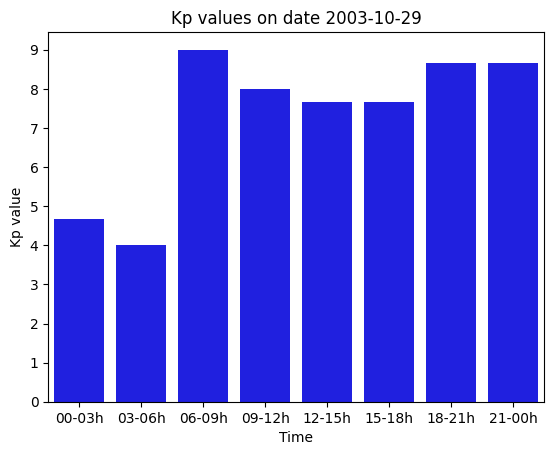

In [ ]:
kp_values_per_day('2003-10-29', geo_stats)

#Question 3

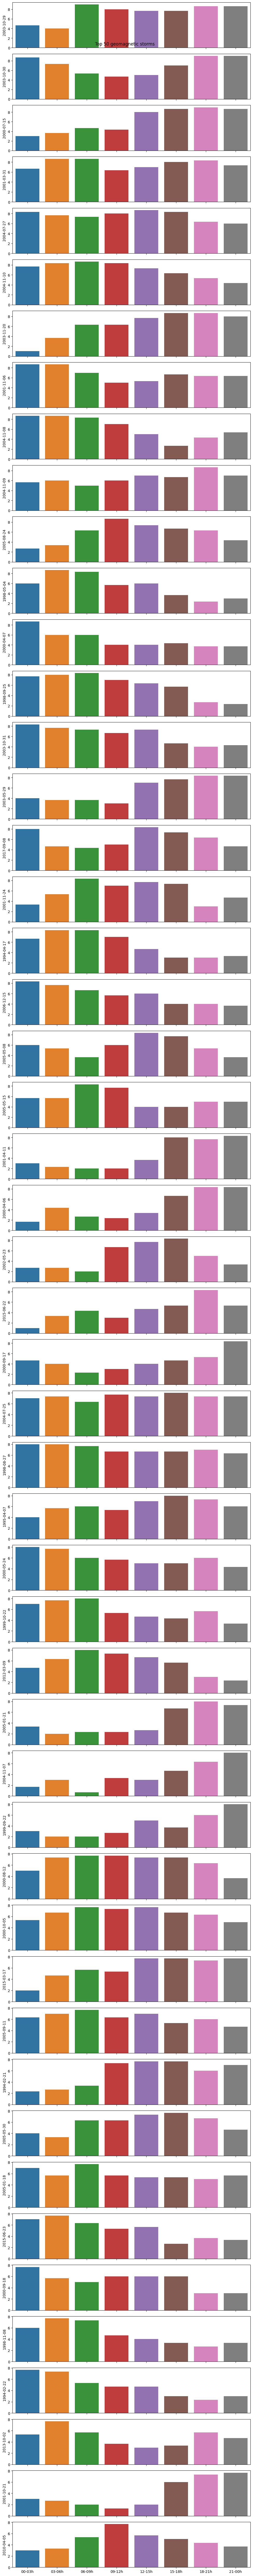

In [ ]:
N = 50
fig, axs = plt.subplots(N, 1, figsize= (10, 100), sharex=True)
plt.suptitle('Top 50 geomagnetic storms')
kp_order = {}
count = -1/3
for i in range(10):
    for j in ['-', 'o', '+']:
        kp_order[f'{i}{j}'] = count
        count += 1/3

kp_time = ['00-03h','03-06h','06-09h','09-12h','12-15h','15-18h','18-21h','21-00h']
for col in kp_time: top_50_geo[f'{col}_power'] = top_50_geo[col].replace(kp_order)

for i in range(N):
    # Create line plot for the date
    day_stat = copy.deepcopy(top_50_geo[top_50_geo['Date'] == top_50_geo.iloc[i]['Date']])
    for col in kp_time: day_stat[f'{col}'] = day_stat[f"{col}_power"]
    sns.barplot(day_stat[[f'{col}' for col in kp_time]], ax=axs[i])

    # Set title to the date
    axs[i].set_ylabel(f"{day_stat.iloc[0]['Date'].strftime('%Y-%m-%d')}", rotation=90)
    axs[i].set_xticklabels(axs[i].get_xticklabels())
    for label in axs[i].xaxis.get_ticklabels():
        label.set_text(label.get_text()[:6])
        label.set_visible(True)

plt.tight_layout()
plt.show()


#Question 4

Plot where each of the dates is shown with as a line rather than as a bar chart

In [ ]:
#Selecting the order (based on 10) from the kp_values provided
#Order is 0-: -1/3, 0o: 0, 0+: 1/3, 1-; 2/3, 1o: 1, 1+: 4/3 and so on
kp_order = {}
count = -1/3
for i in range(10):
    for j in ['-', 'o', '+']:
        kp_order[f'{i}{j}'] = count
        count += 1/3

#Getting the kp value numbers for top 50 powerful geomagnetic storm plots
kp_time = ['00-03h','03-06h','06-09h','09-12h','12-15h','15-18h','18-21h','21-00h']
for col in kp_time: top_50_geo[f'{col}_power'] = top_50_geo[col].replace(kp_order)
kp_time_power = [f'{i}_power' for i in kp_time]
fig = go.Figure()

#Plotting for each date having powerful geomagnetic storm
for num in range(50):
    fig.add_trace(go.Scatter(x=kp_time, y=top_50_geo.iloc[num][kp_time_power], mode='lines', name=top_50_geo.iloc[num]['Date'].strftime("%Y-%m-%d")))
fig.update_xaxes(title='Time')
fig.update_yaxes(title='Kp')
fig.update_layout(title_text="Top 50 geomagnetic storm day's Kp")
fig.show()

Click on the dates in the right to remove or insert that date's kp values in the graph.